## Part 1 : Voronoi mesh generation

In [1]:
import warnings ## Org
warnings.filterwarnings('ignore') ## Org

import os, sys ## Org
import geopandas as gpd ## Org
from mf6Voronoi.geoVoronoi import createVoronoi ## Org
from mf6Voronoi.meshProperties import meshShape ## Org
from mf6Voronoi.utils import initiateOutputFolder, getVoronoiAsShp ## Org

In [2]:
#Create mesh object specifying the coarse mesh and the multiplier
vorMesh = createVoronoi(meshName='regionalModel',maxRef = 250, multiplier=1) ## Org

#Open limit layers and refinement definition layers
vorMesh.addLimit('basin','../../../datasets/regionalModel/shp/catchment.shp') ## Org
vorMesh.addLayer('river','../../../datasets/regionalModel/shp/river_basin.shp',100) ## Org

In [3]:
#Generate point pair array
vorMesh.generateOrgDistVertices() ## Org

#Generate the point cloud and voronoi
vorMesh.createPointCloud() ## Org
vorMesh.generateVoronoi() ## Org

Follow us:,,,,,,



/--------Layer river discretization-------/
Progressive cell size list: [100, 200] m.

/----Sumary of points for voronoi meshing----/
Distributed points from layers: 1
Points from layer buffers: 3031
Points from max refinement areas: 4136
Points from min refinement areas: 0
Total points inside the limit: 7978
/--------------------------------------------/

Time required for point generation: 12.83 seconds 


/----Generation of the voronoi mesh----/

Time required for voronoi generation: 4.98 seconds 



In [4]:
#Export generated voronoi mesh
initiateOutputFolder('output') ## Org
getVoronoiAsShp(vorMesh.modelDis, shapePath='output/'+vorMesh.modelDis['meshName']+'.shp') ## Org

The output folder output exists and has been cleared

/----Generation of the voronoi shapefile----/

Time required for voronoi shapefile: 4.18 seconds 



<AxesSubplot: >

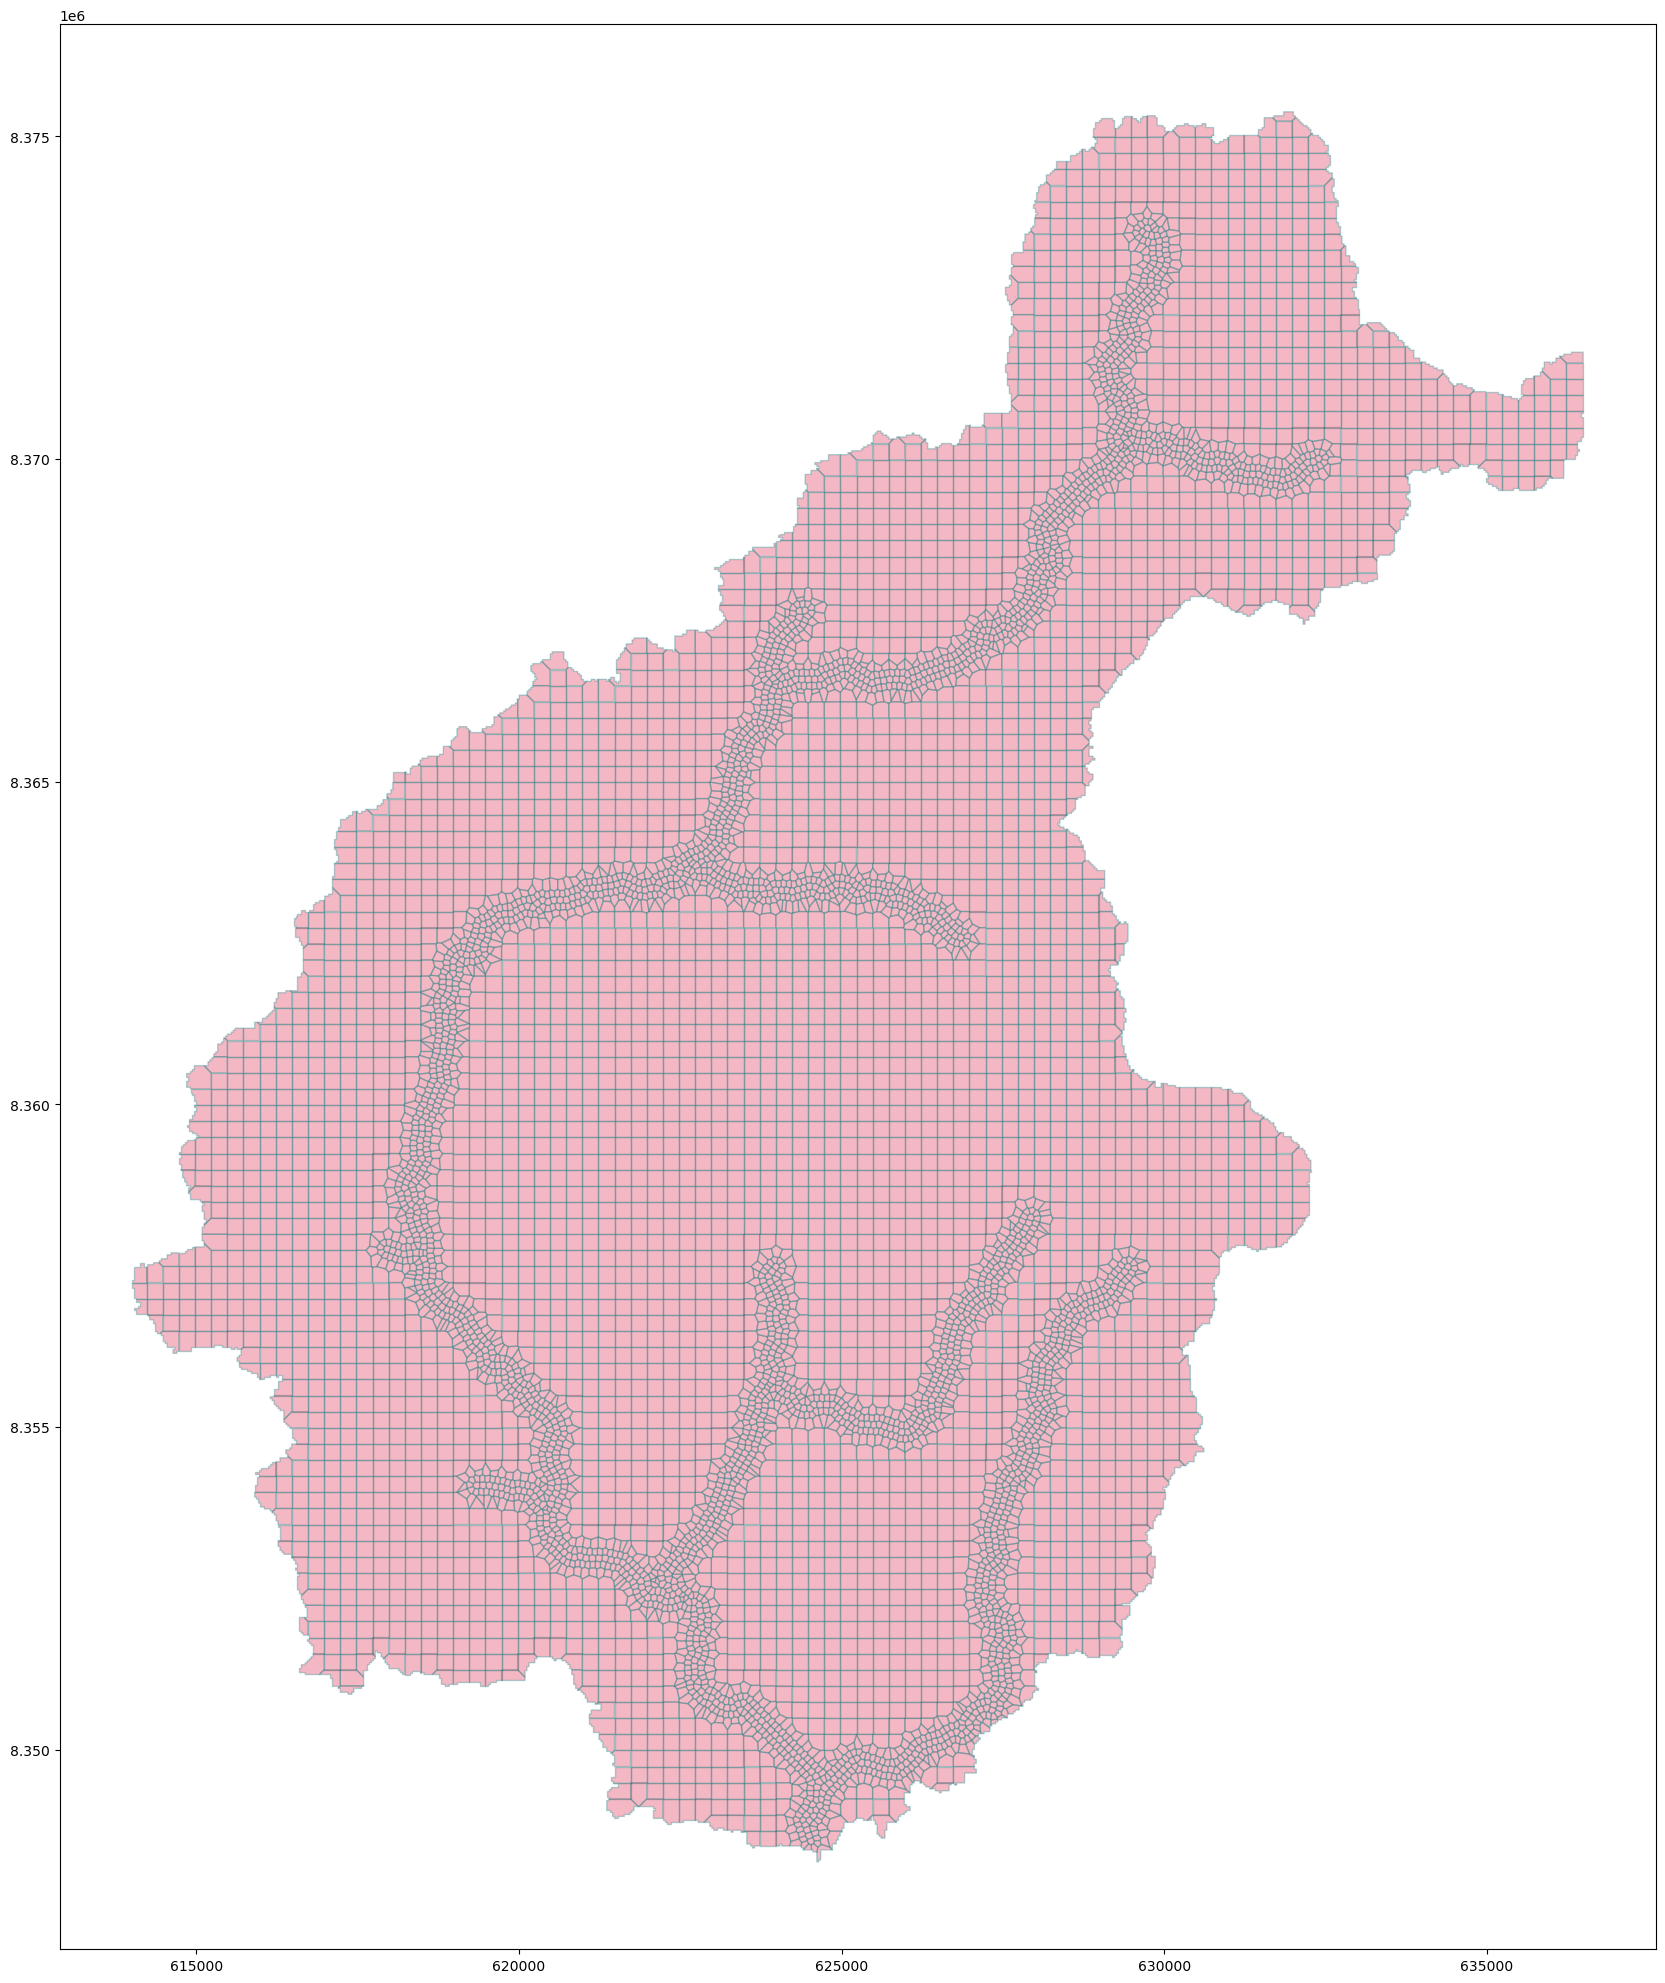

In [5]:
# Show the resulting voronoi mesh

#open the mesh file
mesh=gpd.read_file('output/'+vorMesh.modelDis['meshName']+'.shp') ## Org
#plot the mesh
mesh.plot(figsize=(35,25), fc='crimson', alpha=0.3, ec='teal') ## Org

## Part 2 generate disv properties

In [6]:
# open the mesh file
mesh=meshShape('output/'+vorMesh.modelDis['meshName']+'.shp') ## Org

In [7]:
# get the list of vertices and cell2d data
gridprops=mesh.get_gridprops_disv() ## Org


Creating a unique list of vertices [[x1,y1],[x2,y2],...]


100%|██████████| 7985/7985 [00:00<00:00, 42797.38it/s]



Extracting cell2d data and grid index


100%|██████████| 7985/7985 [00:00<00:00, 8413.19it/s]


In [8]:
#create folder
initiateOutputFolder('json') ## Org

#export disv
mesh.save_properties('json/disvDict.json') ## Org

The output folder json exists and has been cleared
